In [1]:
import signal_processing, data_load, learn, evaluate, render

Using TensorFlow backend.


In [2]:
num_rows = 45
num_columns = 300
num_channels = 1

num_epochs = 100
num_batch_size = 13
num_speakers = 10
num_seconds = 5.0
sample_rate = 30050

In [3]:
featuresdf = data_load.make_dataframe_sr(num_speakers, './Dataset/wav/', num_rows, num_columns, num_seconds, sample_rate)

Finished feature extraction from  970  files


In [4]:
result_sets = data_load.make_train_test_sets(featuresdf, num_rows, num_columns, num_channels)
num_labels = result_sets[4]
model = learn.build_CNN_model(num_rows, num_columns, num_labels)

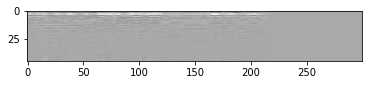

In [5]:
path = 'C:/Users/Maria/Documents/Licenta/Proiect/Dataset/wav/id10001/9mQ11vBs1wc/00004.wav'
render.show_mfccs(path, num_rows, num_columns, num_seconds)

In [6]:
learn.compile(model)

In [7]:
evaluate.evaluate_before_training(model, result_sets[0], result_sets[2]) 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 44, 299, 16)       80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 22, 149, 16)       0         
_________________________________________________________________
dropout (Dropout)            (None, 22, 149, 16)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 21, 148, 32)       2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 74, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 73, 64)         8

In [8]:
featuresdf

,feature,class_label,class
0,"[[-235.69145, -239.47325, -235.33328, -233.518...",A.J._Buckley,0
1,"[[-146.39217, -161.1062, -180.12555, -180.4852...",A.J._Buckley,0
2,"[[-233.81807, -237.11519, -223.36884, -207.894...",A.J._Buckley,0
3,"[[-388.61636, -393.3104, -395.61295, -339.7140...",A.J._Buckley,0
4,"[[-214.03096, -226.68974, -233.36862, -230.058...",A.J._Buckley,0
...,...,...,...
965,"[[-257.10907, -296.00583, -365.22134, -368.763...",Adam_Brody,9
966,"[[-508.29355, -507.61142, -517.8586, -522.1546...",Adam_Brody,9
967,"[[-445.03873, -449.12286, -453.53738, -453.527...",Adam_Brody,9
968,"[[-347.13574, -357.89816, -367.5305, -370.6379...",Adam_Brody,9


In [9]:
class_weight = learn.calculate_class_weight(featuresdf)
history = learn.train_model_class_weights(model, result_sets, num_epochs, num_batch_size, 'CNNCwSr', 'default', 'CNNCwSr', class_weight)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train on 776 samples, validate on 194 samples
Epoch 1/100
767/776 [============================>.] - ETA: 0s - loss: 24.8013 - accuracy: 0.1499
Epoch 00001: val_loss improved from inf to 10.79689, saving model to saved_models/weights.best.CNNCwSr.hdf5
776/776 [==============================] - 9s 12ms/sample - loss: 24.6621 - accuracy: 0.1521 - val_loss: 10.7969 - val_accuracy: 0.2216
Epoch 2/100
767/776 [============================>.] - ETA: 0s - loss: 10.2900 - accuracy: 0.2920
Epoch 00002: val_loss improved from 10.79689 to 9.86805, saving model to saved_models/weights.best.CNNCwSr.hdf5
776/776 [==============================] - 8s 10ms/sample - loss: 10.3125 - accuracy: 0.2925 - val_loss: 9.8680 - val_accuracy: 0.2629
Epoch 3/100
767/776 [============================>.] - ETA: 0s - loss: 9.1706 - accuracy: 0.3977
Epoch 00003: val_loss improved from 9.86805 to 8.74625, saving model to saved_models/weights.best.CNNCwSr.hdf5
776/776 [

767/776 [============================>.] - ETA: 0s - loss: 2.0101 - accuracy: 0.8787
Epoch 00025: val_loss did not improve from 2.20961
776/776 [==============================] - 7s 9ms/sample - loss: 1.9926 - accuracy: 0.8789 - val_loss: 2.2925 - val_accuracy: 0.8093
Epoch 26/100
767/776 [============================>.] - ETA: 0s - loss: 1.9549 - accuracy: 0.8566
Epoch 00026: val_loss improved from 2.20961 to 2.08505, saving model to saved_models/weights.best.CNNCwSr.hdf5
776/776 [==============================] - 7s 9ms/sample - loss: 1.9633 - accuracy: 0.8557 - val_loss: 2.0851 - val_accuracy: 0.8763
Epoch 27/100
767/776 [============================>.] - ETA: 0s - loss: 1.9226 - accuracy: 0.8696
Epoch 00027: val_loss improved from 2.08505 to 2.00101, saving model to saved_models/weights.best.CNNCwSr.hdf5
776/776 [==============================] - 7s 9ms/sample - loss: 1.9330 - accuracy: 0.8698 - val_loss: 2.0010 - val_accuracy: 0.8866
Epoch 28/100
767/776 [=========================

Epoch 53/100
767/776 [============================>.] - ETA: 0s - loss: 0.5621 - accuracy: 0.9596
Epoch 00053: val_loss did not improve from 1.17407
776/776 [==============================] - 8s 10ms/sample - loss: 0.5638 - accuracy: 0.9575 - val_loss: 1.2183 - val_accuracy: 0.9381
Epoch 54/100
767/776 [============================>.] - ETA: 0s - loss: 0.9643 - accuracy: 0.9348
Epoch 00054: val_loss did not improve from 1.17407
776/776 [==============================] - 8s 10ms/sample - loss: 0.9807 - accuracy: 0.9330 - val_loss: 1.9137 - val_accuracy: 0.8918
Epoch 55/100
767/776 [============================>.] - ETA: 0s - loss: 0.8932 - accuracy: 0.9348
Epoch 00055: val_loss did not improve from 1.17407
776/776 [==============================] - 8s 10ms/sample - loss: 0.8836 - accuracy: 0.9356 - val_loss: 1.6635 - val_accuracy: 0.9227
Epoch 56/100
767/776 [============================>.] - ETA: 0s - loss: 0.7169 - accuracy: 0.9557
Epoch 00056: val_loss did not improve from 1.17407
77

Epoch 82/100
767/776 [============================>.] - ETA: 0s - loss: 0.2231 - accuracy: 0.9844
Epoch 00082: val_loss did not improve from 1.04534
776/776 [==============================] - 7s 10ms/sample - loss: 0.2206 - accuracy: 0.9845 - val_loss: 1.4780 - val_accuracy: 0.9536
Epoch 83/100
767/776 [============================>.] - ETA: 0s - loss: 0.2933 - accuracy: 0.9752
Epoch 00083: val_loss did not improve from 1.04534
776/776 [==============================] - 7s 10ms/sample - loss: 0.2899 - accuracy: 0.9755 - val_loss: 1.3396 - val_accuracy: 0.9227
Epoch 84/100
767/776 [============================>.] - ETA: 0s - loss: 0.3340 - accuracy: 0.9752
Epoch 00084: val_loss did not improve from 1.04534
776/776 [==============================] - 8s 10ms/sample - loss: 0.3302 - accuracy: 0.9755 - val_loss: 1.6459 - val_accuracy: 0.9381
Epoch 85/100
767/776 [============================>.] - ETA: 0s - loss: 0.3400 - accuracy: 0.9713
Epoch 00085: val_loss did not improve from 1.04534
77

In [10]:
evaluate.evaluate_model(model, 'CNNCwSr', result_sets)

Training Accuracy:  0.9974227
Testing Accuracy:  0.9381443


In [11]:
evaluate.display_metrics(model, 'CNNCwSr', result_sets)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        43
           3       0.90      0.90      0.90        20
           4       0.92      0.92      0.92        13
           5       0.90      0.87      0.88        30
           6       0.88      1.00      0.93        14
           7       1.00      0.88      0.93        16
           8       0.86      1.00      0.92        12
           9       0.82      0.75      0.78        12

    accuracy                           0.94       194
   macro avg       0.93      0.93      0.93       194
weighted avg       0.94      0.94      0.94       194

Confusion matrix: 
[[16  0  0  0  0  0  0  0  0  0]
 [ 0 18  0  0  0  0  0  0  0  0]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 18  0  1  0  0  0  1]
 [ 0  0  0  0 12  0  0  0  0  1]
 [ 0  0  0  1  0 26  1  0  2  0]
 [ 0  0  0  0  0  0 14  

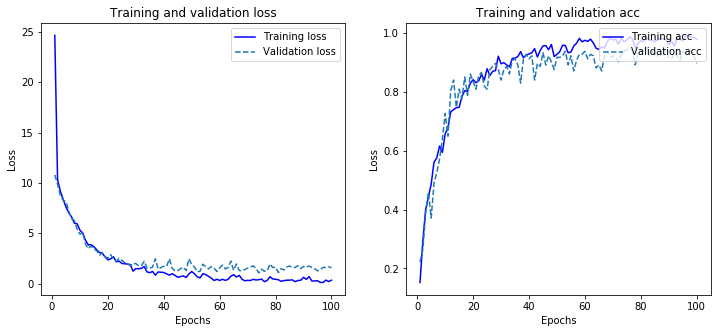

In [12]:
evaluate.plot_history(history)

In [13]:
modelReg = learn.build_regularized_CNN_model(num_rows, num_columns, num_labels)
learn.compile(modelReg)
reg_history= learn.train_model_class_weights(modelReg, result_sets, 
                                             num_epochs, num_batch_size, 'CNNCwSrReg', 'regularization', 'CNNCwSrReg', class_weight)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train on 776 samples, validate on 194 samples
Epoch 1/100
767/776 [============================>.] - ETA: 0s - loss: 24.9850 - accuracy: 0.1213
Epoch 00001: val_loss improved from inf to 12.87762, saving model to saved_models/weights.best.CNNCwSrReg.hdf5
776/776 [==============================] - 9s 12ms/sample - loss: 24.8511 - accuracy: 0.1237 - val_loss: 12.8776 - val_accuracy: 0.1546
Epoch 2/100
767/776 [============================>.] - ETA: 0s - loss: 12.2930 - accuracy: 0.2347
Epoch 00002: val_loss improved from 12.87762 to 11.48399, saving model to saved_models/weights.best.CNNCwSrReg.hdf5
776/776 [==============================] - 8s 10ms/sample - loss: 12.2813 - accuracy: 0.2358 - val_loss: 11.4840 - val_accuracy: 0.2371
Epoch 3/100
767/776 [============================>.] - ETA: 0s - loss: 10.8504 - accuracy: 0.3090
Epoch 00003: val_loss improved from 11.48399 to 10.63411, saving model to saved_models/weights.best.CNNCwSrReg.

Epoch 26/100
767/776 [============================>.] - ETA: 0s - loss: 2.9340 - accuracy: 0.8605
Epoch 00026: val_loss did not improve from 3.32752
776/776 [==============================] - 8s 10ms/sample - loss: 2.9802 - accuracy: 0.8582 - val_loss: 3.4924 - val_accuracy: 0.8196
Epoch 27/100
767/776 [============================>.] - ETA: 0s - loss: 2.7737 - accuracy: 0.8631
Epoch 00027: val_loss improved from 3.32752 to 3.03651, saving model to saved_models/weights.best.CNNCwSrReg.hdf5
776/776 [==============================] - 8s 10ms/sample - loss: 2.7737 - accuracy: 0.8634 - val_loss: 3.0365 - val_accuracy: 0.8711
Epoch 28/100
767/776 [============================>.] - ETA: 0s - loss: 2.4990 - accuracy: 0.8827
Epoch 00028: val_loss did not improve from 3.03651
776/776 [==============================] - 8s 10ms/sample - loss: 2.4838 - accuracy: 0.8840 - val_loss: 3.1469 - val_accuracy: 0.8505
Epoch 29/100
767/776 [============================>.] - ETA: 0s - loss: 2.2691 - accurac

Epoch 54/100
767/776 [============================>.] - ETA: 0s - loss: 1.2293 - accuracy: 0.9635
Epoch 00054: val_loss did not improve from 2.22067
776/776 [==============================] - 8s 10ms/sample - loss: 1.2321 - accuracy: 0.9626 - val_loss: 2.6728 - val_accuracy: 0.8711
Epoch 55/100
767/776 [============================>.] - ETA: 0s - loss: 1.2018 - accuracy: 0.9622
Epoch 00055: val_loss did not improve from 2.22067
776/776 [==============================] - 8s 10ms/sample - loss: 1.1991 - accuracy: 0.9626 - val_loss: 2.5558 - val_accuracy: 0.8969
Epoch 56/100
767/776 [============================>.] - ETA: 0s - loss: 1.1365 - accuracy: 0.9700
Epoch 00056: val_loss did not improve from 2.22067
776/776 [==============================] - 7s 9ms/sample - loss: 1.1341 - accuracy: 0.9704 - val_loss: 2.6816 - val_accuracy: 0.8969
Epoch 57/100
767/776 [============================>.] - ETA: 0s - loss: 1.0896 - accuracy: 0.9778
Epoch 00057: val_loss did not improve from 2.22067
776

Epoch 83/100
767/776 [============================>.] - ETA: 0s - loss: 0.9255 - accuracy: 0.9765
Epoch 00083: val_loss did not improve from 1.80218
776/776 [==============================] - 7s 9ms/sample - loss: 0.9224 - accuracy: 0.9768 - val_loss: 1.8659 - val_accuracy: 0.9278
Epoch 84/100
767/776 [============================>.] - ETA: 0s - loss: 1.0246 - accuracy: 0.9687
Epoch 00084: val_loss did not improve from 1.80218
776/776 [==============================] - 7s 9ms/sample - loss: 1.0211 - accuracy: 0.9691 - val_loss: 1.9858 - val_accuracy: 0.9278
Epoch 85/100
767/776 [============================>.] - ETA: 0s - loss: 0.8804 - accuracy: 0.9857
Epoch 00085: val_loss did not improve from 1.80218
776/776 [==============================] - 7s 9ms/sample - loss: 0.8776 - accuracy: 0.9858 - val_loss: 1.8675 - val_accuracy: 0.9278
Epoch 86/100
767/776 [============================>.] - ETA: 0s - loss: 1.0095 - accuracy: 0.9831
Epoch 00086: val_loss did not improve from 1.80218
776/7

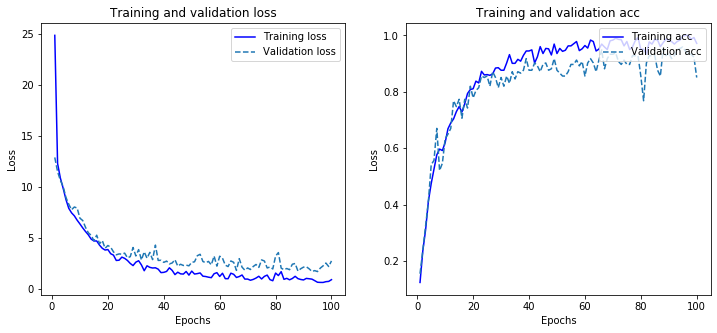

In [14]:
evaluate.plot_history(reg_history)

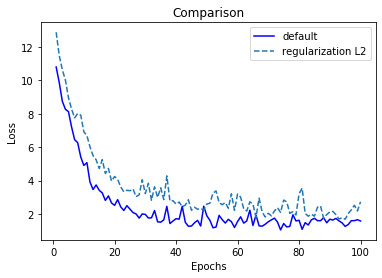

In [15]:
evaluate.plot_compared_val_loss(history, reg_history, 'default', 'regularization L2')
